# Simple Linear Regression

Simple Linear Regression is a fundamental statistical technique used in data science and predictive modeling. It examines the relationship between two variables: a dependent variable (denoted as y) and an independent variable (denoted as x). The objective is to identify the best-fitting straight line that describes this relationship. This line is defined by two key parameters: the intercept (b₀) and the slope (b₁).




Mathematical Representation
The equation for simple linear regression is:

𝑦
=
𝑏
0
+
𝑏
1
𝑥
+
𝜀
y=b
0
​
 +b
1
​
 x+ε
Where:

y → Dependent variable (target/output)

x → Independent variable (predictor/input)

b₀ → Intercept (the value of y when x = 0)

b₁ → Slope (the rate of change in y for a unit increase in x)

ε → Error term (accounts for variability not explained by x)

Let us start by uploading a CSV file from local storage into Google Colab using the files.upload() function from the google.colab module. This will open a file selection dialog where you can choose your CSV file.


import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:

uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


import the salary  datset

You can download the CSV file used for the exercises here: : https://drive.google.com/file/d/1vi1orFCbHy6SzyhaDuhEbjYta39M0VOH/view?usp=sharing

In [ ]:
data=pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Let us inspect the data:

In [ ]:
data.shape

(30, 2)

The dataset has 30 rows and 2 columns.

In [ ]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000



Minimum years of experience is 1.1 with a salary of 27414.4 and max years of experience is 10.5 with a salary of 122391.

# Handling missing values

In [ ]:
data.isnull().any()

,0
YearsExperience,False
Salary,False


# Let us visualise the data:

This is a scatter plot showing the relationship between Years of Experience (x-axis) and Salary (y-axis).

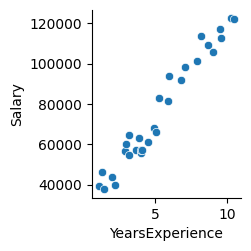

In [ ]:
sns.pairplot(y_vars = 'Salary', x_vars = 'YearsExperience' ,data = data)

There's a clear positive correlation between the two variables. As years of experience increase, salary tends to increase as well.

In [ ]:
# checking the correlation of the data
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000



0.97 is highly correlated means that here's a very strong positive relationship between years of experience and salary.  More experience almost always means higher pay.


# Data preparation:

split the data into training and testing

In [ ]:
X = data['YearsExperience']
y = data['Salary']

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
X_train.shape

(21,)

In [ ]:
X_test.shape

(9,)

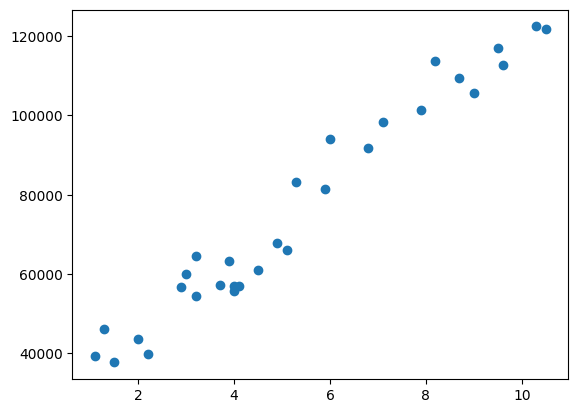

In [ ]:
plt.scatter(X,y)

While the plot shows a link between experience and salary, the spread of the data points indicates that other factors besides experience also affect how much someone earns.

# Model Building:

1.train the model

2.test the model

3.evaluate the model

In [ ]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           9.91e-14
Time:                        10:47:15   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.52e+04   2875.387     


So our linear regression equation is :

Salary = 25200 + YearsExperience x 9731.2038

# Let us show the line fitting:

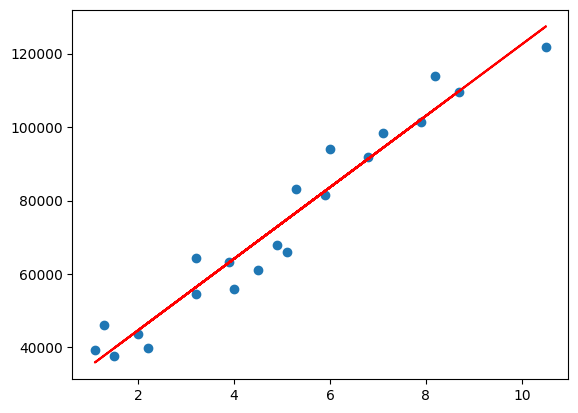

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 25200 + X_train * 9731.2038,'r')
plt.show()

This graph shows how salary  tends to increase with years of experience. The line helps estimate salary based on experience, but the scattered points show the relationship isn't perfect.  Other factors besides experience also influence salary.

# Residual analysis:

In [ ]:
y_train_pred = model.predict(X_train_sm)

In [ ]:
y_train_pred.head()

,0
17,76778.268129
22,102079.398108
11,64127.703139
4,46611.536230
29,127380.528088


In [ ]:
residual = (y_train - y_train_pred)

In [ ]:
residual.head()

,0
17,6309.731871
22,-777.398108
11,-8333.703139
4,-6720.536230
29,-5508.528088


The residual result showed that the model's predictions had significant errors:

For 17, the residual was 6309.73, meaning the model underestimated the actual value.
For 22, 11, 94, and 29, the residuals were negative, meaning the model overestimated their actual values.


<ipython-input-24-de15f7a7b687>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: ylabel='Density'>

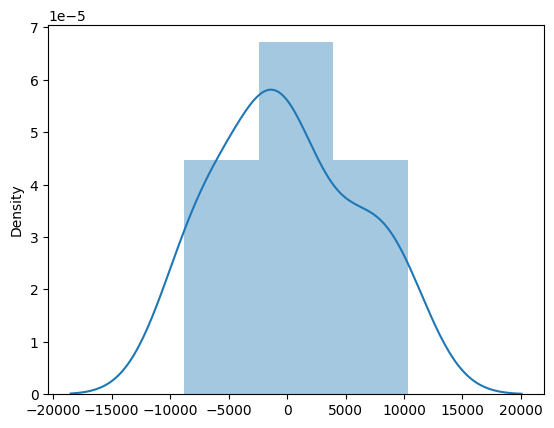

In [ ]:
sns.distplot(residual)

The residual plot shows the distribution of errors (differences between actual and predicted values). The residuals are centered around 0, meaning the model has no strong bias. The spread of values suggests some large errors, indicating possible outliers or high variance.

# Predictions on the test data:

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:

y_pred = model.predict(X_test_sm)


# Root mean squared error:

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

5505.479002176121


The RMSE of 5505.48 means that, on average, the model's predicted salary is off by about 5,505 from the actual salary.

# R2 score:

In [ ]:
r2_score(y_test,y_pred)

0.9627668685473271

An R-squared score of 96.27% means the model explains 96.27% of the variation in the target variable (salary) using the predictor variable (years of experience). (96.27%) of the changes in salary can be explained by the differences in years of experience. The remaining 3.73% of the variation might be due to other factors not included in the data, such as education, skills, location, or random chance.

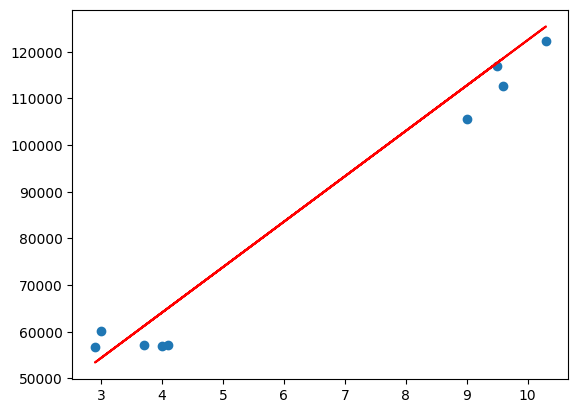

In [ ]:
# Let us show the line fitting:
plt.scatter(X_test,y_test)
plt.plot(X_test, 25200 + X_test * 9731.2038,'r')
plt.show()

The graph showed a positive correlation between experience and salary. However, some points deviate from the line, indicating prediction errors (residuals).